In [31]:
#load model and testing data
from tensorflow import keras
import pickle

model = keras.models.load_model('../models/pre_model_2_2.h5')

with open('../local_data/test_img_2.pickle', 'rb') as f:
    X_test, y_test = pickle.load(f)

In [32]:
X_test.shape, y_test.shape

((442, 512, 512, 3), (442, 2))

In [33]:
import numpy as np
from keras.utils import to_categorical
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), predicted_classes))

14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       281
           1       0.94      0.71      0.81       161

    accuracy                           0.88       442
   macro avg       0.90      0.84      0.86       442
weighted avg       0.89      0.88      0.87       442



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


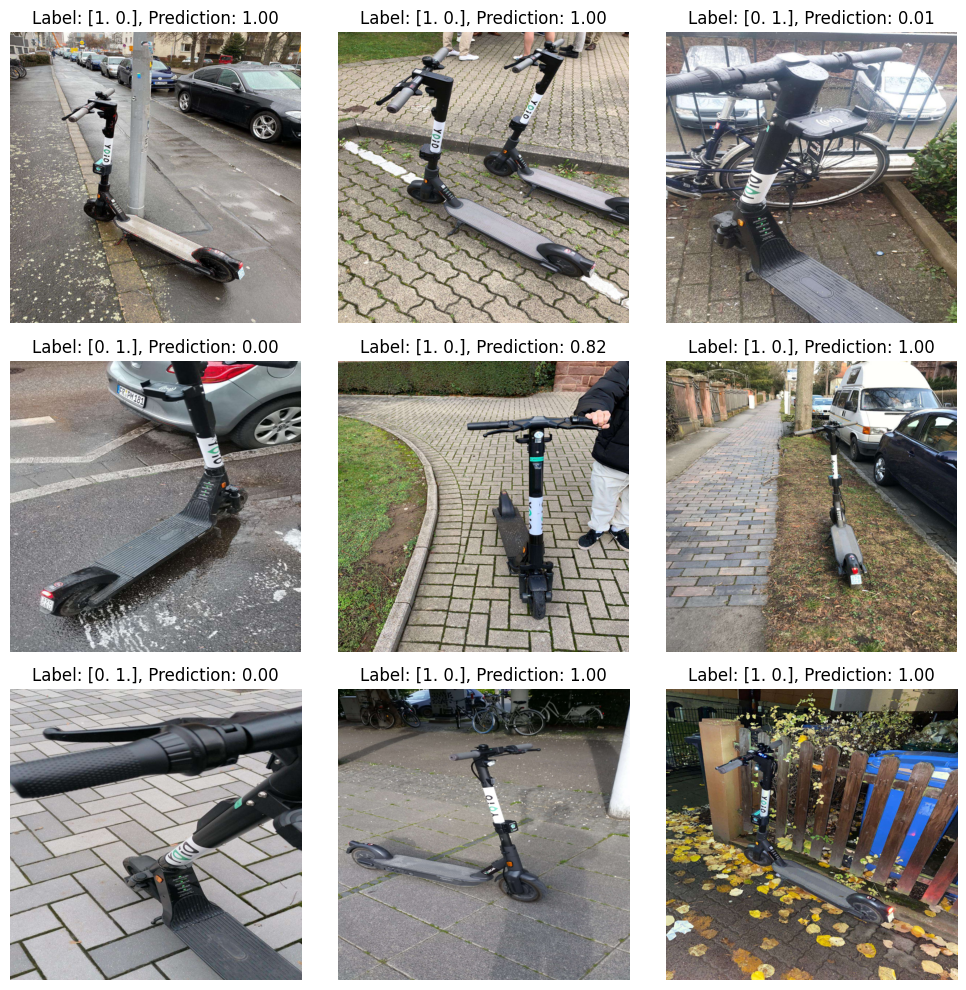

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test, y_test, and predicted_classes are defined and accessible in this cell
X_test = X_test.astype(np.float32)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[idx])
    ax.set_title(f"Label: {y_test[idx]}, Prediction: {model.predict(X_test[idx][np.newaxis, ...])[0][0]:.2f}")
    ax.axis('off')
plt.tight_layout()
plt.show()